In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv("Loan Eligibility Prediction.csv")
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


In [3]:
df['Gender'] = df['Gender'].map({"Male":0,"Female":1})
df['Gender']

0      1
1      0
2      0
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Gender, Length: 614, dtype: int64

In [4]:
df['Married'] = df['Married'].map({"No":0,"Yes" :1})
df['Married']

0      0
1      1
2      0
3      1
4      1
      ..
609    1
610    0
611    1
612    1
613    1
Name: Married, Length: 614, dtype: int64

In [5]:
df['Education'] = df['Education'].map({"Not Graduate":0,"Graduate" :1})
df['Education']

0      1
1      1
2      0
3      1
4      1
      ..
609    1
610    1
611    1
612    0
613    0
Name: Education, Length: 614, dtype: int64

In [6]:
df['Self_Employed'] = df['Self_Employed'].map({"No":0,"Yes" :1})
df['Self_Employed']

0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    1
612    0
613    0
Name: Self_Employed, Length: 614, dtype: int64

In [7]:
df['Property_Area'] = df['Property_Area'].map({"Rural":0,"Semiurban" :1,"Urban":2})
df['Property_Area']

0      2
1      2
2      1
3      1
4      1
      ..
609    2
610    1
611    0
612    0
613    2
Name: Property_Area, Length: 614, dtype: int64

In [8]:
df['Loan_Status'] = df['Loan_Status'].map({"N":0, "Y" :1})
df['Loan_Status'] 

0      0
1      1
2      1
3      1
4      1
      ..
609    0
610    0
611    0
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [9]:
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,1,0,0,1,0,2378,0.0,9,360,1,2,0
1,15,0,1,2,1,0,1299,1086.0,17,120,1,2,1
2,95,0,0,0,0,0,3620,0.0,25,120,1,1,1
3,134,0,1,0,1,1,3459,0.0,25,120,1,1,1
4,556,0,1,1,1,0,5468,1032.0,26,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,0,1,2,1,0,2947,1603.0,10,360,1,2,0
610,525,0,0,0,1,0,4680,2087.0,15,360,1,1,0
611,551,0,1,2,1,1,6633,0.0,25,360,0,0,0
612,552,0,1,1,0,0,2492,2375.0,30,360,1,0,1


In [10]:
x = df.drop(['Customer_ID','Loan_Status'],axis = 1)
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,2378,0.0,9,360,1,2
1,0,1,2,1,0,1299,1086.0,17,120,1,2
2,0,0,0,0,0,3620,0.0,25,120,1,1
3,0,1,0,1,1,3459,0.0,25,120,1,1
4,0,1,1,1,0,5468,1032.0,26,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,1,0,2947,1603.0,10,360,1,2
610,0,0,0,1,0,4680,2087.0,15,360,1,1
611,0,1,2,1,1,6633,0.0,25,360,0,0
612,0,1,1,0,0,2492,2375.0,30,360,1,0


In [11]:
y = df.Loan_Status
y

0      0
1      1
2      1
3      1
4      1
      ..
609    0
610    0
611    0
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [12]:
type(x)

pandas.core.frame.DataFrame

In [13]:
type(y)

pandas.core.series.Series

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [15]:
clf = DecisionTreeClassifier(random_state = 2539,max_depth = 3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=2539)

In [16]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
83,1,0,1,0,0,4606,0.000000,81,360,1,0
90,0,1,1,1,1,16667,2250.000000,86,360,1,1
227,0,1,0,1,0,2600,3500.000000,115,120,1,2
482,0,0,0,1,0,4683,1915.000000,185,360,1,1
464,1,1,0,0,0,2149,3237.000000,178,360,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,2,1,0,2301,985.799988,78,180,1,2
106,1,0,0,1,1,2500,0.000000,93,360,1,2
270,0,1,0,1,0,2698,2034.000000,122,360,1,1
435,0,0,2,1,0,5532,4648.000000,162,360,1,0


In [17]:
y_train

83     0
90     1
227    1
482    0
464    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 491, dtype: int64

In [18]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
350,0,0,2,1,0,4354,0.0,136,360,1,0
377,0,1,2,0,0,3357,2859.0,144,360,1,2
163,0,1,1,1,0,2491,2054.0,104,360,1,1
609,0,1,2,1,0,2947,1603.0,10,360,1,2
132,0,0,0,1,0,2935,0.0,98,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
231,1,0,0,1,0,4124,0.0,115,360,1,1
312,0,1,0,1,0,4750,2333.0,130,360,1,2
248,1,1,0,1,0,2645,3440.0,120,360,0,2
11,0,1,0,1,0,3716,0.0,42,180,1,0


In [19]:
y_test

350    1
377    1
163    1
609    0
132    1
      ..
231    1
312    1
248    0
11     1
333    0
Name: Loan_Status, Length: 123, dtype: int64

In [20]:
y_predict = clf.predict(x_test)

In [21]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [22]:
clf.score(x_test,y_test)

0.8130081300813008

[Text(0.4583333333333333, 0.875, 'x[9] <= 0.5\ngini = 0.427\nsamples = 491\nvalue = [152, 339]'),
 Text(0.25, 0.625, 'x[7] <= 480.0\ngini = 0.219\nsamples = 72\nvalue = [63, 9]'),
 Text(0.16666666666666666, 0.375, 'x[6] <= 8115.0\ngini = 0.2\nsamples = 71\nvalue = [63, 8]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.18\nsamples = 70\nvalue = [63, 7]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'x[6] <= 9650.5\ngini = 0.335\nsamples = 419\nvalue = [89, 330]'),
 Text(0.5, 0.375, 'x[10] <= 0.5\ngini = 0.326\nsamples = 414\nvalue = [85, 329]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.418\nsamples = 111\nvalue = [33, 78]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.284\nsamples = 303\nvalue = [52, 251]'),
 Text(0.8333333333333334, 0.375, 'x[5] <= 2168.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]

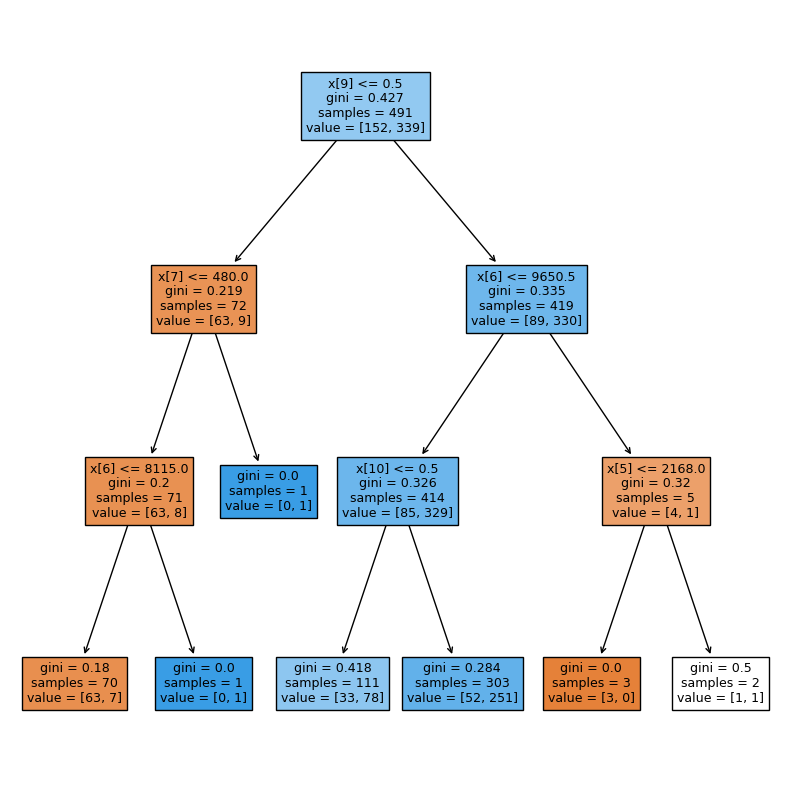

In [23]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(clf,filled = True)
